# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt


Load in the "states_edu.csv" dataset and take a look at the head of the data

In [17]:
state = pd.read_csv('../data/states_edu.csv')
state.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
columns_to_fill = [
    'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
    'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'GRADES_4_G', 'GRADES_8_G',
    'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G',
    'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'
]
states[columns_to_fill] = states[columns_to_fill].apply(lambda col: col.fillna(col.median()))

states.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,405111.5,186919.0,731634.0,208.0,252.0,207.0,265.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,405111.5,186919.0,122487.0,238.0,280.5,220.0,265.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,405111.5,186919.0,673477.0,215.0,265.0,209.0,265.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,405111.5,186919.0,441490.0,210.0,256.0,211.0,265.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,405111.5,186919.0,5254844.0,208.0,261.0,202.0,265.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math


How many years of data are logged in our dataset? 

In [8]:
states['YEAR'].max() - states['YEAR'].min()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [12]:
a = (states[states['STATE']== 'MICHIGAN']['GRADES_4_G'].mean())
b = (states[states['STATE']== 'OHIO']['GRADES_4_G'].mean())
if(a>b):
    print("Michigan")
else:
    print("Fake News")

Fake News


Find the average for your chosen test across all states in 2019

In [13]:
states['GRADES_4_G'].mean()

68194.73002915453

For each state, find a maximum value for your chosen test score

In [15]:
states.groupby('STATE')['GRADES_4_G'].max()

STATE
ALABAMA                  60012.0
ALASKA                   49087.0
ARIZONA                  89184.0
ARKANSAS                 49087.0
CALIFORNIA              493415.0
COLORADO                 69784.0
CONNECTICUT              49087.0
DELAWARE                 49087.0
DISTRICT_OF_COLUMBIA     49087.0
DODEA                    49087.0
FLORIDA                 220504.0
GEORGIA                 138249.0
HAWAII                   49087.0
IDAHO                    49087.0
ILLINOIS                160495.0
INDIANA                  82387.0
IOWA                     49087.0
KANSAS                   49087.0
KENTUCKY                 52487.0
LOUISIANA                63884.0
MAINE                    49087.0
MARYLAND                 70330.0
MASSACHUSETTS            79385.0
MICHIGAN                134163.0
MINNESOTA                67226.0
MISSISSIPPI              49087.0
MISSOURI                 71928.0
MONTANA                  49087.0
NATIONAL                 49087.0
NEBRASKA                 49087.0
NEVA

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

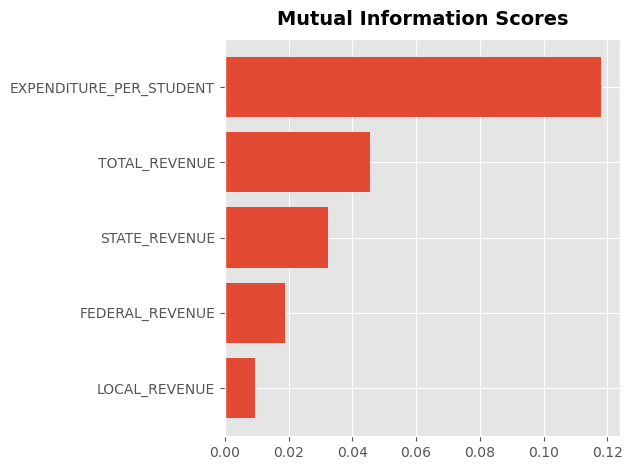

In [37]:
#By using drop.na and .size Im able to see that there is a lot of missing values
#Then I choose to go and use mutual information which i have experince with 
#helps you decide what features are very impactful

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

plt.style.use("ggplot")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

state = pd.read_csv("../data/states_edu.csv")

columns_to_fill = [
    'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE',
    'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
    'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
    'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
    'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'
]
state[columns_to_fill] = state[columns_to_fill].apply(lambda col: col.fillna(col.median()))

state['EXPENDITURE_PER_STUDENT'] = state['TOTAL_EXPENDITURE'] / state['ENROLL']

state_cleaned = state.dropna(subset=['EXPENDITURE_PER_STUDENT', 'AVG_MATH_4_SCORE'])

X = state_cleaned[['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'EXPENDITURE_PER_STUDENT']]
y = state_cleaned['AVG_MATH_4_SCORE']

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    return mi_scores.sort_values(ascending=False)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

mi_scores = make_mi_scores(X, y)

plot_mi_scores(mi_scores)


# Display the plot
plt.show()



Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

**<The mutual info regression score is much greater than all others indicating it is good canidate for further research**

**Visualization 2**

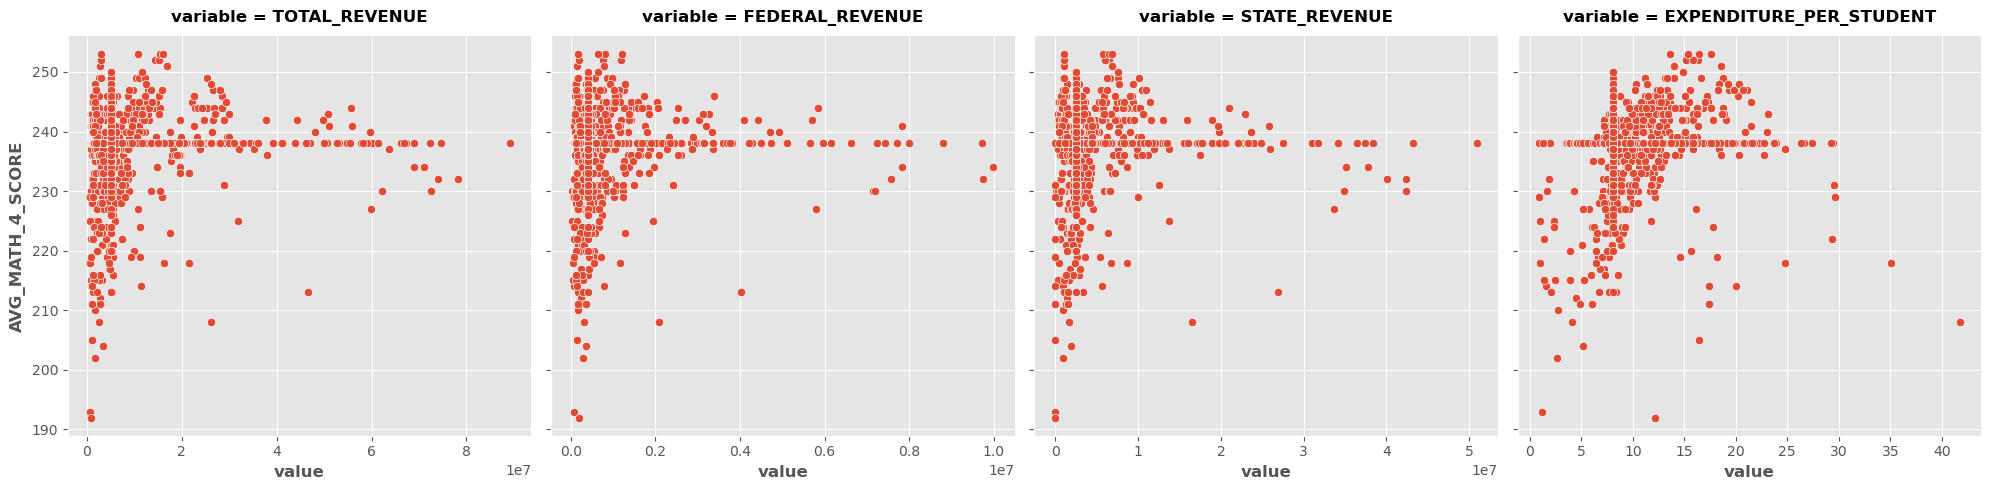

In [40]:

features = ['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'EXPENDITURE_PER_STUDENT']
# Use seaborn to create the relational plot for the given features against AVG_MATH_4_SCORE
sns.relplot(
    x="value", y="AVG_MATH_4_SCORE", col="variable", 
    data=state_cleaned.melt(id_vars="AVG_MATH_4_SCORE", value_vars=features), 
    facet_kws=dict(sharex=False)
)
# Display the plot
plt.show()

**Again, Expenditure is the only graph to reasemble a linear relationship near that upper left **

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [42]:
from sklearn.model_selection import train_test_split

In [62]:
X = state_cleaned[['TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'EXPENDITURE_PER_STUDENT']]
y = state_cleaned['AVG_MATH_4_SCORE']


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [64]:
# import your sklearn class here
from sklearn.ensemble import RandomForestRegressor

In [65]:
# create your model here
model = RandomForestRegressor()

In [66]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

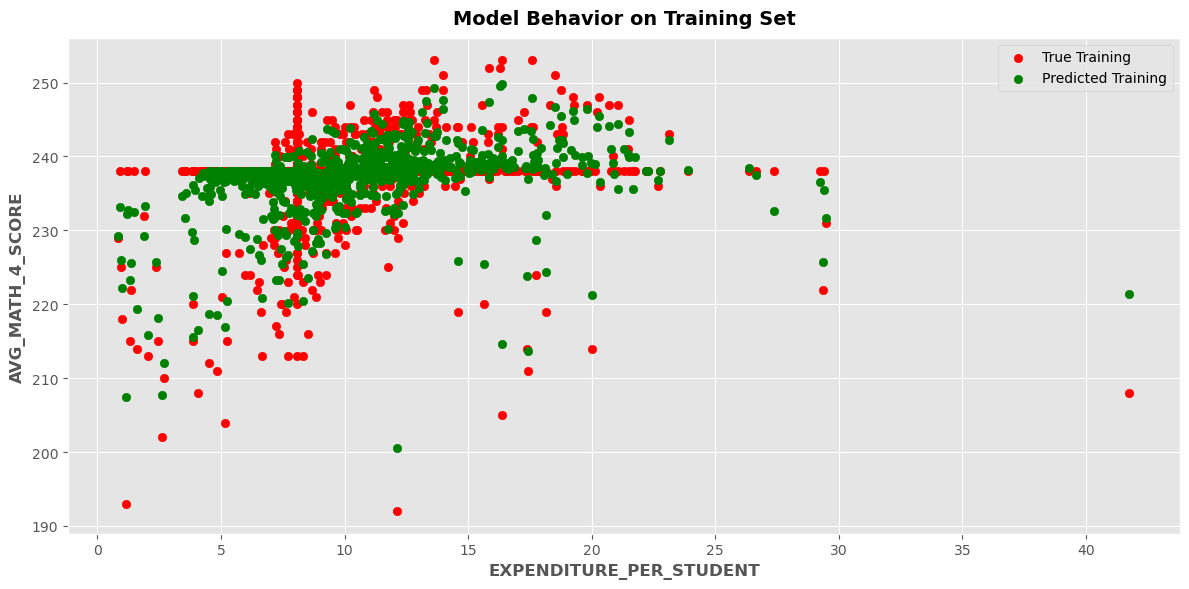

In [68]:

import matplotlib.pyplot as plt
# Select a column to visualize
col_name = 'EXPENDITURE_PER_STUDENT'  # Example column

# Training set plot
plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color="red", label="True Training")
plt.scatter(X_train[col_name], model.predict(X_train), color="green", label="Predicted Training")
plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')  # This is the target variable you're predicting
plt.title("Model Behavior on Training Set")
plt.show()

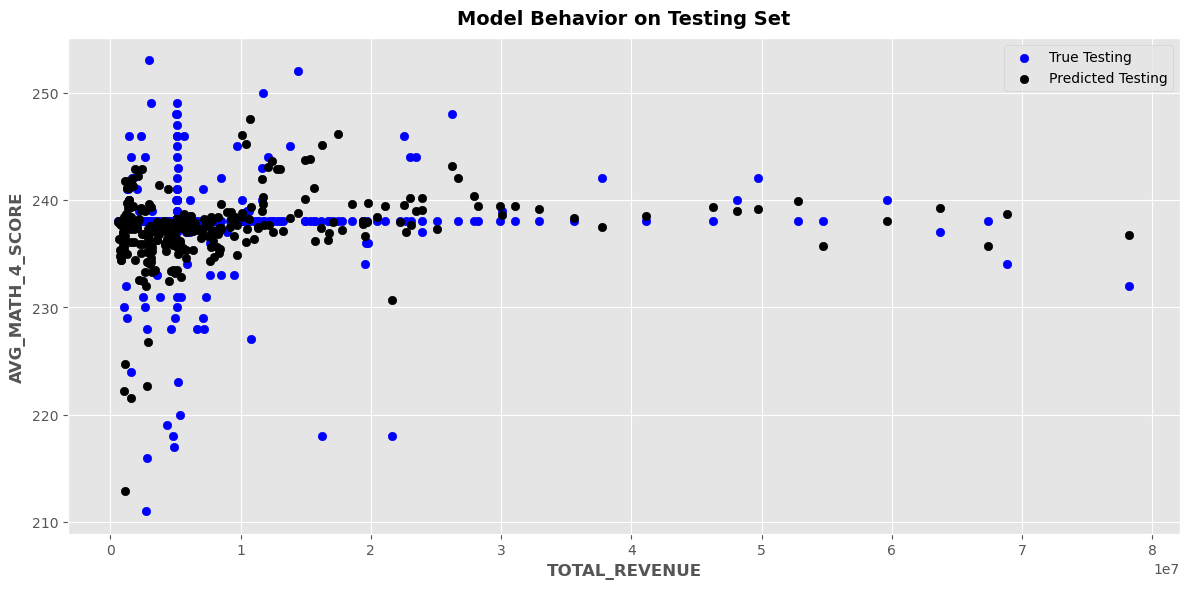

In [71]:
col_name = 'TOTAL_REVENUE'
plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color="blue", label="True Testing")
plt.scatter(X_test[col_name], model.predict(X_test), color="black", label="Predicted Testing")
plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')
plt.title("Model Behavior on Testing Set")
plt.show()